In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy, fidelity

f = open('./benchmark_data/evaluator_input_ibmq_johannesburg_supremacy.p', 'rb' )
plotter_input = pickle.load(f)
print(plotter_input.keys())

dict_keys([(9, 10), (8, 10), (7, 10), (9, 12), (6, 12), (8, 14), (9, 14), (7, 14)])


In [4]:
case = (7,14)
plotter_input = plotter_input[case]
print(plotter_input.keys())

circ = plotter_input['full_circ']
d1 = plotter_input['fc_evaluations']['sv_noiseless']
d2 = plotter_input['fc_evaluations']['qasm']
d3 = plotter_input['fc_evaluations']['hw']
print(sum(d1),sum(d2),sum(d3))

dict_keys(['full_circ', 'fc_shots', 'searcher_time', 'clusters', 'complete_path_map', 'fc_evaluations'])
0.9999999999999973 0.9999999999999855 1.0000000000000526


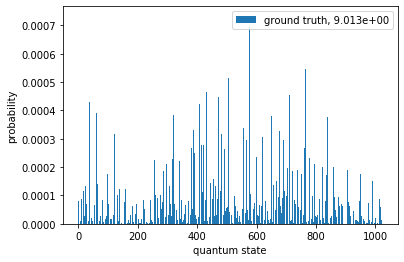

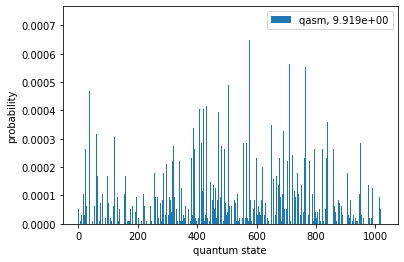

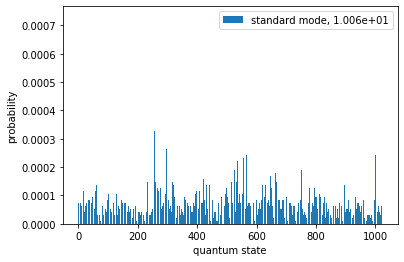

In [5]:
plot_range = min(len(d1),1024)
x = np.arange(len(d1))[:plot_range]
y_lim = max(max(d1[:plot_range]),max(d2[:plot_range]),max(d3[:plot_range]))*1.1

plt.figure()
plt.bar(x,height=d1[:plot_range],label='ground truth, %.3e'%cross_entropy(d1,d1))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()

plt.figure()
plt.bar(x,height=d2[:plot_range],label='qasm, %.3e'%cross_entropy(d1,d2))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()

plt.figure()
plt.bar(x,height=d3[:plot_range],label='standard mode, %.3e'%cross_entropy(d1,d3))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()